## `Setup Init`

In [2]:
# Importing python library

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import plotly
from plotly.offline import iplot

import phik
from phik.report import plot_correlation_matrix

from flexitext import flexitext

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# load the data

df = pd.read_csv(r'D:\JCDS_2023\Capstone 2\data\processed\online_retail_shipping.csv', engine='pyarrow')
df.sample(5)

,,Warehouse_block,Mode_of_shipment,Customer_care_calls,Customer_rating,Cost_of_the_product_($),Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered_($),Discount_interval,Weight_in_gms,Weight_Category,Reached_on_Time_(0/1),Revenue_($)
8728,8728,C,Ship,3,4,238,2,0 - 2,Medium,M,7,4 - 10,5974,Large,0,231
7573,7573,E,Ship,3,5,154,2,0 - 2,Medium,M,6,4 - 10,4675,Medium,1,148
6414,6414,D,Road,5,2,168,2,0 - 2,Low,F,10,> 10,5225,Large,1,158
7160,7160,A,Ship,5,3,257,5,2 - 4,Low,F,3,0 - 4,1262,Small,1,254
2342,2342,A,Flight,5,2,260,3,2 - 4,Low,F,22,> 10,2935,Medium,1,238


In [4]:
# Showing unique values from dataset

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,,int64,0.0,False,10999,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Warehouse_block,object,0.0,False,5,"[D, E, A, B, C]"
2,Mode_of_shipment,object,0.0,False,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0.0,False,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,0.0,False,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_product_($),int64,0.0,False,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
6,Prior_purchases,int64,0.0,False,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Prior_purchases_interval,object,0.0,False,3,"[2 - 4, 0 - 2, > 4]"
8,Product_importance,object,0.0,False,3,"[Low, Medium, High]"
9,Gender,object,0.0,False,2,"[F, M]"


## `Data Analysis`
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu permasalahan utama **Bagaimana karakteristik dari mode of shipment untuk efisiensi dan efektivitas kinerja?**

Analisis akan dilakukan dengan menjawab beberapa pertanyaan terkait aspek yang berkaitan dengan efisiensi dan efektivitas.

### `Efficiency`

Efisiensi kinerja dapat dilihat dari elemen biaya, pelanggan, dan inventory. Penjelasan terkait metrics yang digunakan dapat dilihat pada journal (DOI: 10.17485/ijst/2017/v10i11/106135). Matriks utama pada komponen biaya adalah Revenue yang diperoleh dari cost - discount. Elemen pelanggan dapat dilihat berdasarkan customer care calls dan customer rating. Inventory dapat dilihat dari prior purchases.

- `Apakah terdapat perbedaan Revenue antara mode of shipment yang berbeda?`

In [6]:
# Tabel Mode of shipment and Revenue

Mod_Rev = pd.crosstab(df['Mode_of_shipment'], columns='Total Revenue', values=df['Revenue_($)'], aggfunc='sum')
Mod_Rev

col_0,Total Revenue
Mode_of_shipment,
Flight,348551
Road,347409
Ship,1468903


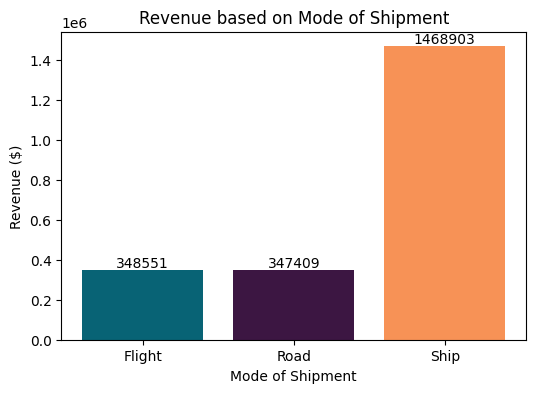

In [64]:
# Plotting the bar chart

plt.figure(figsize=(6, 4))
colors = ['#086375', '#3c1642', '#f79256']
bars = plt.bar(Mod_Rev.index, Mod_Rev['Total Revenue'], color=colors)

# Adding labels and title
plt.title('Revenue based on Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Revenue ($)')

# Adding value labels on top of each bar
for bar in bars:
    plt.gca().annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Display the chart
plt.show()

Insight
- Terdapat perbedaan revenue yang dihasilkan dari masing-masing Mode of Shipment
- Mode pengiriman yang memberikan jumlah Revenue terbanyak adalah Ship 
- Perusahaan dapat mempertahankan penggunaan Mode of Shipment berjenis Ship karena berkontribusi pada perolehan jumlah Revenue 

- `Bagaimana hubungan antara customer care calls dengan revenue berdasarkan Mode of Shipment?`

In [7]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['Customer_care_calls'], df['Revenue_($)'])

print('Korelasi:', correlation)
print('Nilai p:', p_value)

Korelasi: 0.30799912298735094
Nilai p: 2.4256807210395877e-240


Insight

Korelasi bernilai positif dan signifikan secara statistik menunjukkan hubungan yang kuat antara jumlah customer care calls dengan revenue. Nilai p-value kurang dari 0.05 menunjukkan adanya bukti yang cukup kuat bahwa hubungan tersebut tidak muncul secara kebetulan.

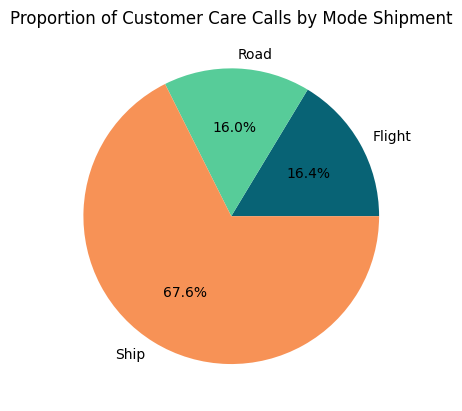

In [6]:
# Pie Chart Proportion of Customer Care Calls

total_calls = df.groupby('Mode_of_shipment')['Customer_care_calls'].sum()

total_revenue = df.groupby('Mode_of_shipment')['Revenue_($)'].sum()

summary_data = pd.DataFrame({'Total Calls': total_calls, 'Total Revenue': total_revenue})

summary_data['Call Proportion'] = summary_data['Total Calls'] / summary_data['Total Calls'].sum()

colors = ['#086375', '#57cc99', '#f79256']

plt.pie(summary_data['Call Proportion'], labels=summary_data.index, colors=colors, autopct='%1.1f%%')

plt.title('Proportion of Customer Care Calls by Mode Shipment')

plt.show()

Insight

- Mode pengiriman yang mendapat customer care calls terbanyak adalah Ship dengan persentase sebesar 67,6%
- Mode pengiriman Flight memiliki persentase customer care calls sebesar 16,4% dan menempati urutan kedua setelah Ship
- Mode pengiriman Road memiliki persentase customer care calls sebesar 16% dan merupakan terendah dibandingkan moda lainnya
- Selisih persentase customer care calls antara moda Flight dan Road hanya 0,4%
- Perusahan dapat mempertahankan penggunaan Mode of Shipment berjenis Ship dengan kontribusi pada jumlah Revenue 

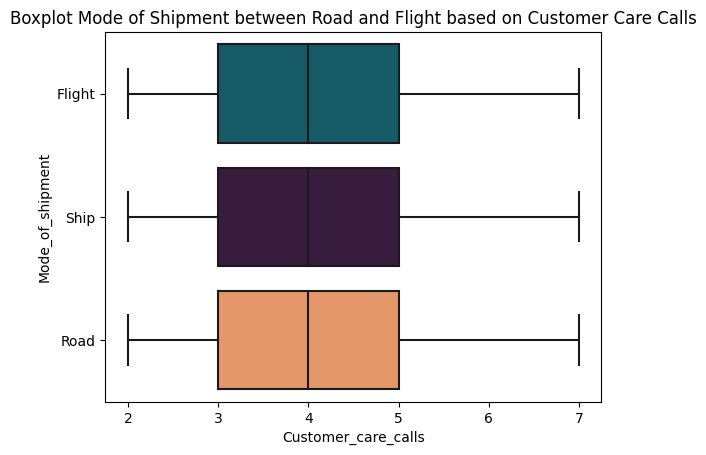

In [24]:
# Bloxpot mode of shipment

sns.boxplot(y='Mode_of_shipment', x='Customer_care_calls', data=df, palette=['#086375', '#3c1642', '#f79256'])
plt.title('Boxplot Mode of Shipment between Road and Flight based on Customer Care Calls')
plt.show()

Insight

Jumlah customer care calls yang ideal untuk masing-masing mode of shipment adalah 4

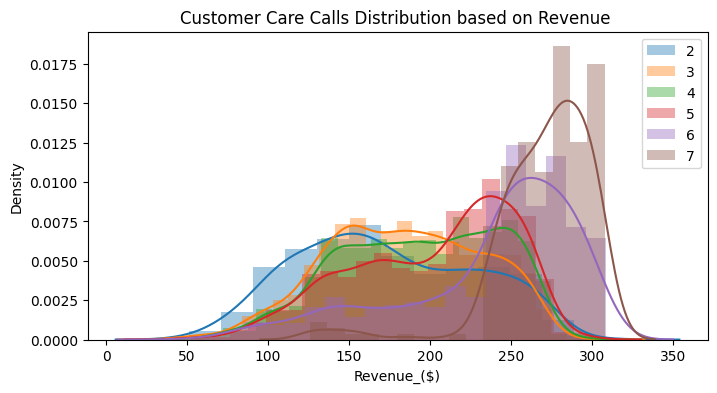

In [5]:
# Distribution of Customer_care_calls

plt.figure(figsize=(8,4))
sns.distplot(df[df['Customer_care_calls']==2]['Revenue_($)'],label=2)
sns.distplot(df[df['Customer_care_calls']==3]['Revenue_($)'],label=3)
sns.distplot(df[df['Customer_care_calls']==4]['Revenue_($)'],label=4)
sns.distplot(df[df['Customer_care_calls']==5]['Revenue_($)'],label=5)
sns.distplot(df[df['Customer_care_calls']==6]['Revenue_($)'],label=6)
sns.distplot(df[df['Customer_care_calls']==7]['Revenue_($)'],label=7)
plt.title('Customer Care Calls Distribution based on Revenue ')
plt.legend()
plt.show()

Insight

Berdasarkan grafik dapat diketahui bahwa ada kecenderungan semakin tinggi jumlah customer care calls, maka revenue yang diperoleh pun akan semakin besar 

- `Bagaimana karakteristik mode of shipment berdasarkan customer rating?`

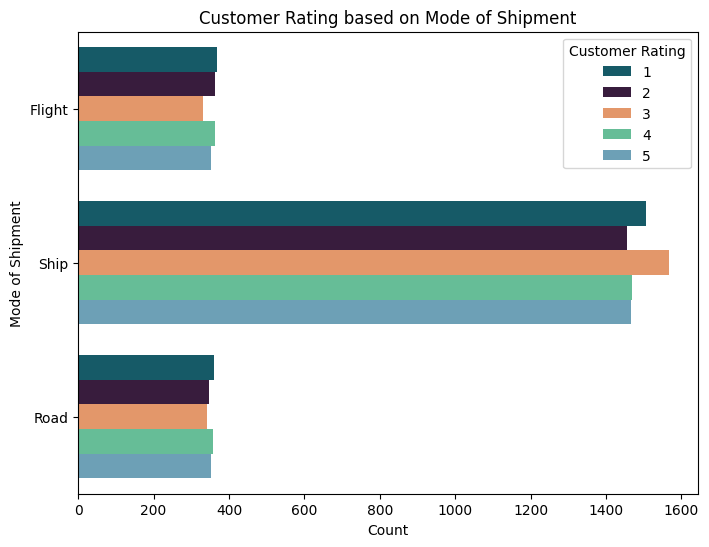

In [32]:
customer_rating = df['Customer_rating']

# Mode of Shipment column
mode_of_shipment = df['Mode_of_shipment']

# Define the color palette with the specified colors
colors = ['#086375', '#3c1642', '#f79256', '#57cc99', '#61a5c2']

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
sns.countplot(y=mode_of_shipment, hue=customer_rating, palette=colors)

# Add labels and title
plt.title('Customer Rating based on Mode of Shipment')
plt.xlabel('Count')
plt.ylabel('Mode of Shipment')

# Show the legend
plt.legend(title='Customer Rating')

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Display the chart
plt.show()

Insight

- Berdasarkan penjelasan skala rating [disini](https://trustmary.com/surveys/introducing-best-5-point-scale-survey/) dari rating 1-5 dapat digolongkan ke dalam skala Bad to Good dengan rincian 1 = Very Poor, 2 = Poor, 3 = Average, 4 = Good, 5 = Very Good
- Mode pengiriman Ship paling banyak mendapat rating 3 dapat dikatakan rating yang diperoleh average
- Mode pengiriman Flight dan Road sama-sama memiliki rating pengiriman terbayak 1 atau very poor. Perusahaan dapat mengevaluasi kedua jenis pengiriman ini untuk mengoptimalkan efisiensi dari segi customer rating

- `Bagaimana karaketristik mode of shipment ditinjau dari prior purchases dan Revenue?`

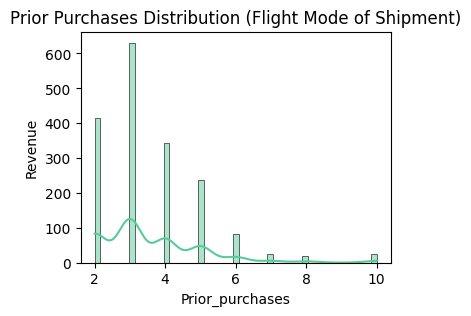

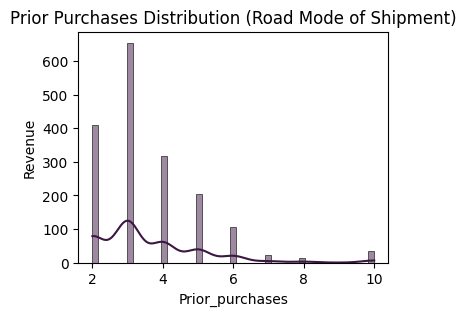

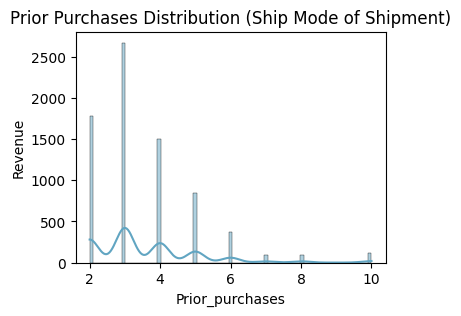

In [66]:
# Customer Rating column
customer_rating = df['Prior_purchases']

# Revenue column
revenue = df['Revenue_($)']

# Mode of Shipment column
mode_of_shipment = df['Mode_of_shipment']

flight_data = df[df['Mode_of_shipment'] == 'Flight']
road_data = df[df['Mode_of_shipment'] == 'Road']
ship_data = df[df['Mode_of_shipment'] == 'Ship']

# Create the histogram chart for Flight mode of shipment
plt.figure(figsize=(4, 3))
sns.histplot(flight_data['Prior_purchases'], kde=True, color='#57cc99')
plt.title('Prior Purchases Distribution (Flight Mode of Shipment)')
plt.xlabel('Prior_purchases')
plt.ylabel('Revenue')
plt.show()

# Create the histogram chart for Road mode of shipment
plt.figure(figsize=(4, 3))
sns.histplot(road_data['Prior_purchases'], kde=True, color='#3c1642')
plt.title('Prior Purchases Distribution (Road Mode of Shipment)')
plt.xlabel('Prior_purchases')
plt.ylabel('Revenue')
plt.show()

# Create the histogram chart for Ship mode of shipment
plt.figure(figsize=(4, 3))
sns.histplot(ship_data['Prior_purchases'], kde=True, color='#61a5c2')
plt.title('Prior Purchases Distribution (Ship Mode of Shipment)')
plt.xlabel('Prior_purchases')
plt.ylabel('Revenue')
plt.show()

Insight

Berdasarkan grafik distribusi, kita dapat mengevaluasi bahwa terdapat pola bahwa pelanggan dengan jumlah pembelian sebelumnya sebanyak 3 barang memiliki kecenderungan untuk menghasilkan  lebih tinggi revenue pada semua mode of shipment. Hal ini dapat memberikan wawasan tentang pentingnya faktor prior purchases dalam meningkatkan efisiensi dan pendapatan dengan mode of shipment.

- `Bagaimana karakteristik mode pengiriman dilihat dari warehouse block dan kategori berat barang?`

In [43]:
pivot_MW = pd.pivot_table(
    data=df,
    index=['Warehouse_block', 'Weight_Category'],
    columns='Mode_of_shipment',
    values='Weight_in_gms',
    aggfunc='count',
    fill_value=0
)

pivot_MW

Mode_of_shipment                 Flight  Road  Ship
Warehouse_block Weight_Category                    
A               Large                95   103   411
                Medium              100    76   366
                Small               102   115   465
B               Large                99    93   436
                Medium               88    91   358
                Small               109   110   449
C               Large                92   100   423
                Medium               96    88   367
                Small               107   106   454
D               Large                98    90   397
                Medium               99    98   387
                Small               100   104   461
E               Large               191   206   873
                Medium              180   166   698
                Small               221   214   917

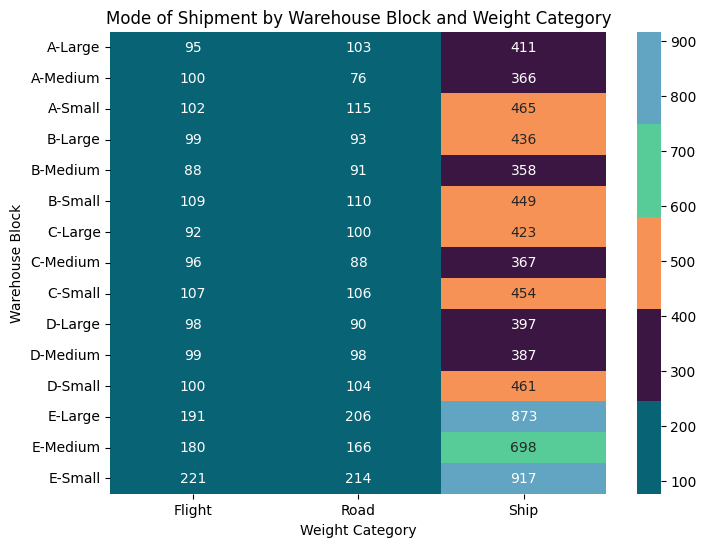

In [46]:
# Create the heatmap
plt.figure(figsize=(8, 6))
colors = ['#086375', '#3c1642', '#f79256', '#57cc99', '#61a5c2']
sns.heatmap(pivot_MW, annot=True, cmap=colors, fmt='d')

plt.title('Mode of Shipment by Warehouse Block and Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Warehouse Block')

plt.show()

Insight

- Mode Ship mendominasi untuk pengiriman barang dengan semua kategori berat pada warehouse E
- Flight dan Road juga banyak mengirimkan kategori barang small dari warehouse E
- Pembagian moda pengiriman barang berdasarkan kategori berat barang belum merata antar warehouse block  


### `Effectivity`

Efektivitas merupakan kerangka kinerja berdasarkan waktu. Untuk itu metric yang digunakan pada elemen ini adalah variabel reach on time. Penjelasan terkait metrics efektivitas dapat dilihat [disini](https://www.yale.com/globalassets/coms/yale/north-america/documents/white-papers/snack-drawer/yale-dcmetrics-infographic.pdf).

- `Bagaimana karakteristik mode of shipment terhadap reach on time?`

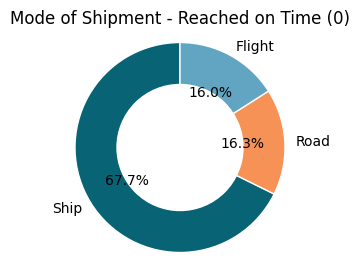

In [8]:
# Mode of shipment which on time
 
mode_of_shipment = df[df['Reached_on_Time_(0/1)'] == 0]['Mode_of_shipment']

# Calculate the count of Mode_of_shipment categories
mode_counts = mode_of_shipment.value_counts()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(4, 3))

# Define colors for the pie chart
colors = ['#086375', '#f79256', '#61a5c2']

# Create the donut pie chart for Mode_of_shipment
wedges, texts, autotexts = ax.pie(mode_counts, labels=mode_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create the donut shape
circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Set title and display the graph
plt.title('Mode of Shipment - Reached on Time (0)')
plt.show()

Insight

Mode Ship memiliki persentase ketepatan waktu dalam pengiriman sebesar 67% dibandingan dengan moda lainnya

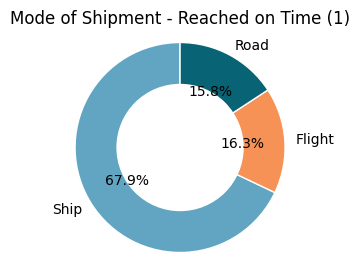

In [8]:
# Mode of shipment which not on time
 
mode_of_shipment = df[df['Reached_on_Time_(0/1)'] == 1]['Mode_of_shipment']

# Calculate the count of Mode_of_shipment categories
mode_counts = mode_of_shipment.value_counts()

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(4, 3))

# Define colors for the pie chart
colors = ['#61a5c2', '#f79256', '#086375']

# Create the donut pie chart for Mode_of_shipment
wedges, texts, autotexts = ax.pie(mode_counts, labels=mode_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create the donut shape
circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Set title and display the graph
plt.title('Mode of Shipment - Reached on Time (1)')
plt.show()

Insight

Mode Ship juga memiliki persentase yang besar terhadap keterlambatan pada pengiriman barang dibandingkan dengan moda lainnya

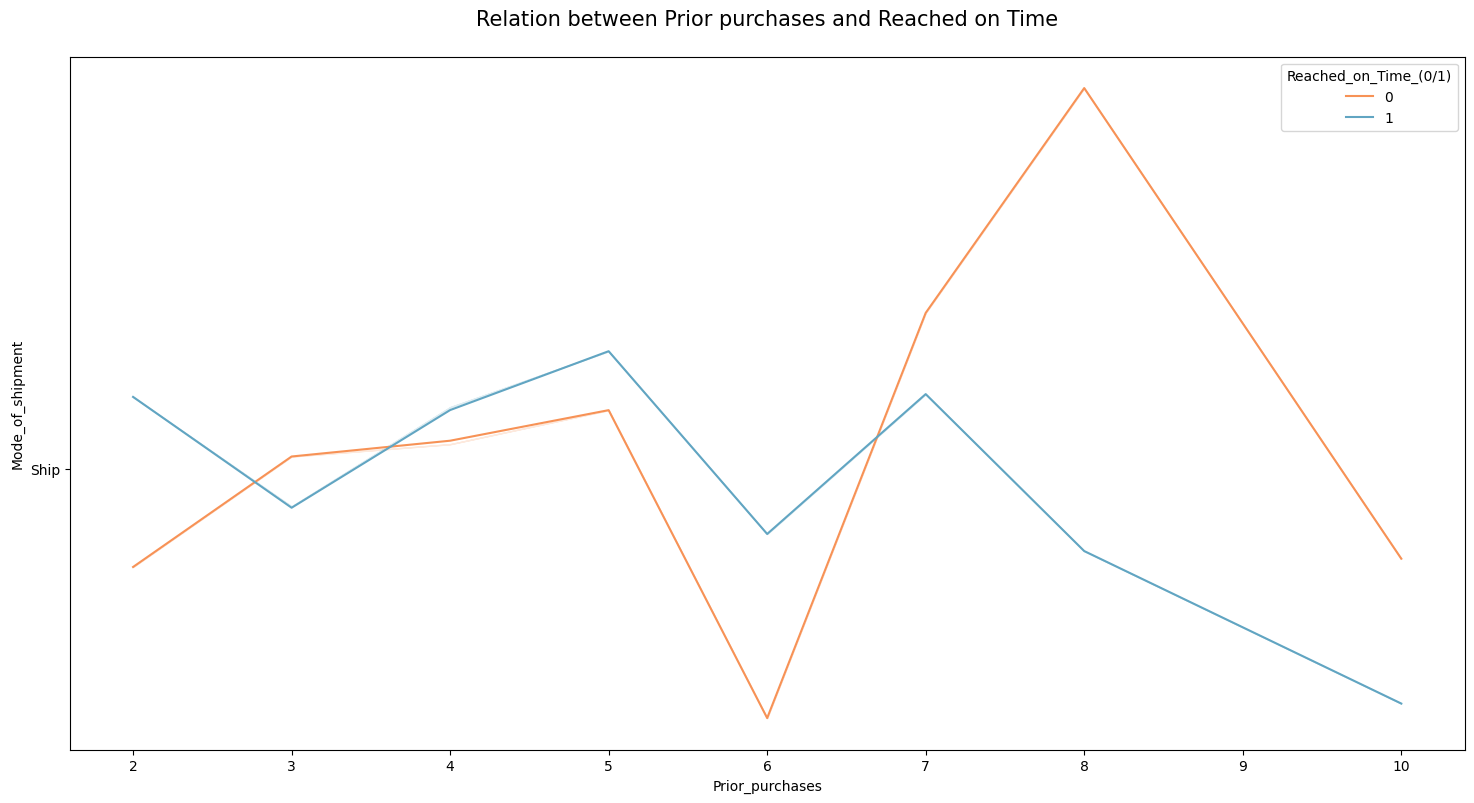

In [74]:
# Lineplot

plt.figure(figsize = (18, 9))
colors = ['#f79256', '#61a5c2']
sns.lineplot(x = 'Prior_purchases', y = 'Mode_of_shipment', hue = 'Reached_on_Time_(0/1)', data = df,
             palette = colors, ci = 0)
plt.title('Relation between Prior purchases and Reached on Time\n',
          fontsize = 15)
plt.show()

Insight

Terdapat hubungan antara pembelian sebelumnya dengan ketepatan waktu dengan mode pengiriman tertentu

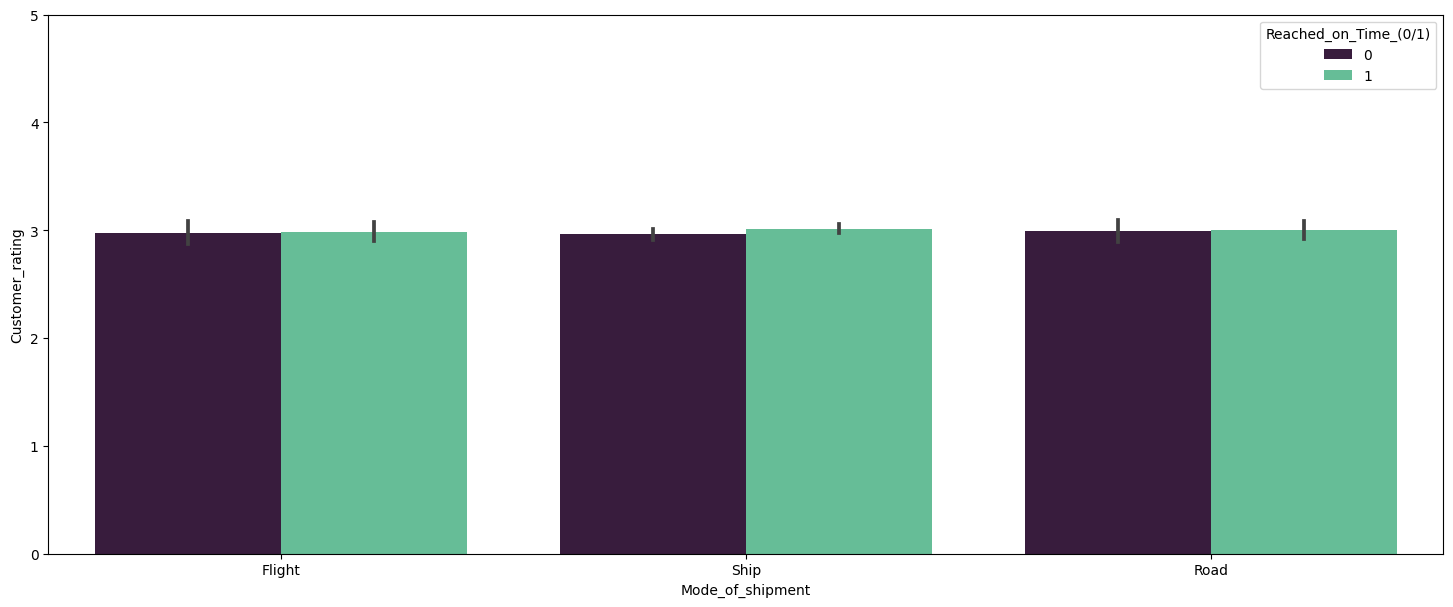

In [76]:
# Mode of Shipment Proportion of Reached on Time (0/1) based on Customer Rating

plt.figure(figsize = (18, 7))
colors = ['#3c1642', '#57cc99'] 
sns.barplot(x = 'Mode_of_shipment', y = 'Customer_rating', hue = 'Reached_on_Time_(0/1)', data = df, palette = colors)
plt.ylim(0, 5)
plt.show()

Insight

Semua mode memiliki proporsi yang sama dalam hal ketepatan waktu maupun keterlambatan pengiriman, sehingga customer rating yang diberikan oleh pelanggan masih di angka 3 atau average

## `Summary`

- Karakteristik dari Mode of Shipment untuk efisiensi kinerja yang dapat disimpulkan dari hasil analisis adalah sebagai berikut.
    - Tinjauan dari sudut pandang biaya, Ship merupakan moda pengiriman yang memberikan jumlah revenue terbanyak dibandingkan dengan moda lainnya.
    - Analisis dari elemen pelanggan dapat diketahui dari variabel customer care calls dan customer rating.
        - Mode pengiriman yang mendapat customer care calls terbanyak adalah Ship dengan persentase sebesar 67,6%
        - Selisih persentase customer care calls antara moda Flight dan Road hanya 0,4%
        - Jumlah customer care calls yang ideal untuk masing-masing mode of shipment adalah 4 
        - Ada kecenderungan pada moda pengiriman tertentu, semakin tinggi jumlah customer care calls, maka revenue yang diperoleh pun akan semakin besar 
        - Mode pengiriman Flight dan Road sama-sama memiliki rating pengiriman terbayak 1 atau very poor. Perusahaan dapat mengevaluasi kedua jenis pengiriman ini untuk mengoptimalkan efisiensi dari segi customer rating
    - Analisis dari elemen inventory dapat diketahui dari variabel prior purchases, weight category, dan warehouse block.
        - Terdapat pola bahwa pelanggan dengan jumlah pembelian sebelumnya sebanyak 3 barang, memiliki kecenderungan untuk menghasilkan revenue lebih pada semua mode of shipment. Hal ini dapat memberikan wawasan tentang pentingnya faktor prior purchases dalam meningkatkan efisiensi dengan mode of shipment.
        - Mode Ship mendominasi untuk pengiriman barang dengan semua kategori berat pada warehouse E
        - Flight dan Road juga banyak mengirimkan kategori barang small dari warehouse E
        - Pembagian moda pengiriman barang berdasarkan kategori berat barang belum merata antar warehouse block.

- Karakteristik dari Mode of Shipment untuk efektivitas kinerja yang dapat disimpulkan dari hasil analisis adalah sebagai berikut.
    - Mode Ship memiliki persentase ketepatan dan keterlambatan waktu dalam pengiriman lebih besar dibandingan dengan moda lainnya.
    - Terdapat hubungan antara pembelian sebelumnya dengan ketepatan waktu dengan mode pengiriman tertentu
    - Semua mode memiliki proporsi yang sama dalam hal ketepatan waktu maupun keterlambatan pengiriman, sehingga customer rating yang diberikan oleh pelanggan masih di angka 3 atau average

## `Recommendations`

Rekomendasi strategi diberikan untuk masing-masing mode of shipment.
- Ship
    - Perusahaan dapat tetap mempertahankan penggunaan mode pengiriman Ship karena mendominasi untuk efisiensi dan efektivitas kinerja.
    - Perusahaan dapat menggembangkan mode Ship menjadi dua yaitu Cargo untuk pengiriman cross border atau lintas negara dan Ferry untuk pengiriman domestik dengan kategori barang tertentu.
- Road
    - Pengiriman menggunakan moda Road lebih baik digunakan untuk wilayah domestik dengan mempertimbangkan keadaan jalur transportasi.
    - Moda Road juga dapat dikembangkan lagi menjadi dua mode yaitu Truck dan Rail. 
    - Mode Truck dapat diterapkan oleh perusahaan untuk efisiensi dengan pertimbangan moda yang fleksibel untuk menjangkau customer.
    - Mode Rail dapat diimplementasikan oleh perusahaan baik untuk lintas negara maupun domestik. Kelebihan dari mode ini yaitu hemat biaya, efisiensi bahan bakar, keamanan barang lebih terjamin, dan dapat mengurangi kemacetan di jalan raya.    
- Flight
    - Perusahaan dapat menerapkan penggunaan mode Flight untuk melakukan pengiriman di wilayah geografis yang sulit di jangkau dengan moda transportasi lainnya.
    - Perusahaan juga dapat menetapkan kriteria barang tertentu ysng bisa menggunakan mode tersebut untuk mengurangi biaya karena resiko yang tinggi.
    - Perusahaan dapat menerapkan solusi teknologi baru untuk pengiriman jalur udara yaitu dengan teknologi drone. 

Sumber rekomendasi:
(https://www.abcexpress.id/blog/kelebihan-kekurangan-pengiriman-cargo-jalur-darat)

(https://www.unionlogistics.co.id/kelebihan-dan-kekurangan-pengiriman-cargo-jalur-udara)

(https://kumparan.com/2211101091/canggih-pengiriman-paket-menggunakan-drone-semakin-nyata-1zbuGGBw26n/4)